<a href="https://colab.research.google.com/github/NancyBudgujjar/Machine-Learning/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
import pandas as pd 	
import matplotlib.pyplot as plt 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/project/Iris_Dataset.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
print(df.isnull().sum()) #checking of any column has null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [8]:
# split data into features and labels as asked in question
X = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [9]:
print(X.sample(5)) #printing 5 values of given features at random

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm
67  68            5.8           2.7            4.1
55  56            5.7           2.8            4.5
91  92            6.1           3.0            4.6
48  49            5.3           3.7            1.5
52  53            6.9           3.1            4.9


In [10]:
print(y.sample(5)) #printing 5 values of given label at random

87     Iris-versicolor
0          Iris-setosa
64     Iris-versicolor
63     Iris-versicolor
110     Iris-virginica
Name: Species, dtype: object


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

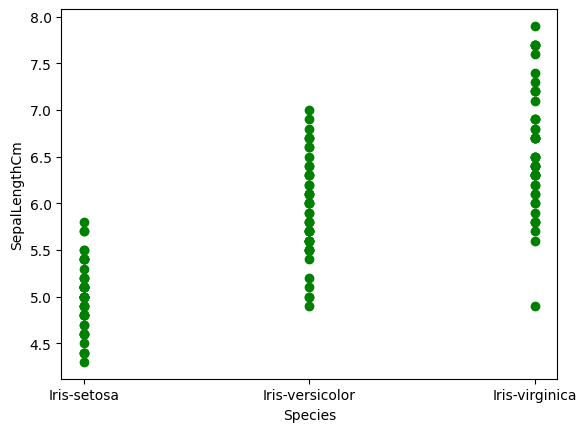

In [14]:
x1 = y.values   
y1 = df.SepalLengthCm.values 
plt.scatter(x1,y1, color='green')
plt.xlabel("Species")
plt.ylabel("SepalLengthCm")
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

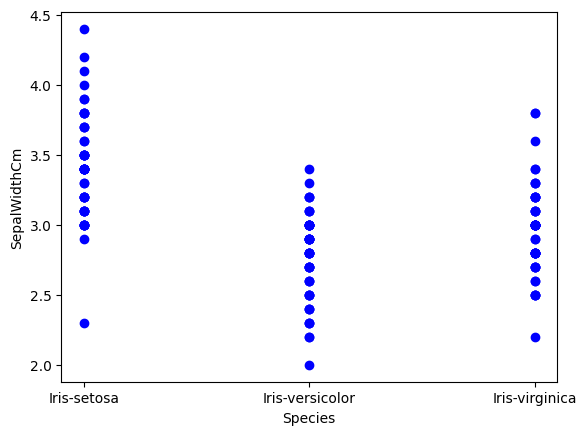

In [13]:
x1 = y.values   
y1 = df.SepalWidthCm.values 
plt.scatter(x1,y1, color='blue')
plt.xlabel("Species")
plt.ylabel("SepalWidthCm")
plt.plot

We have, 3 clusters in the given iris dataset

In [15]:
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

plotting the dataset with the above calculated cluster centers 

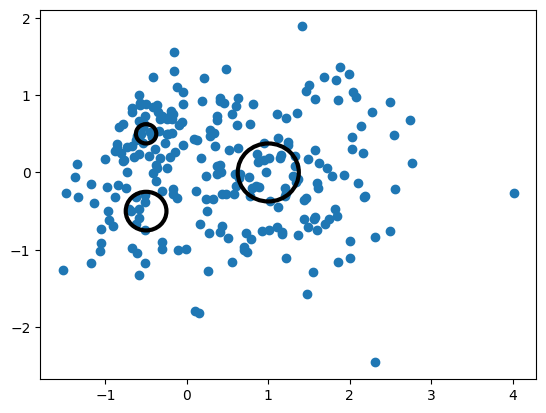

In [16]:
plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=3))

Initializing k centroids by randomly selecting them from the data points

In [17]:
def initialize_centroids(points, k):
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [18]:
initialize_centroids(points, 3)

array([[-0.37094625,  0.06056812],
       [ 1.11954335,  0.44114972],
       [ 1.59765569, -0.13211537]])

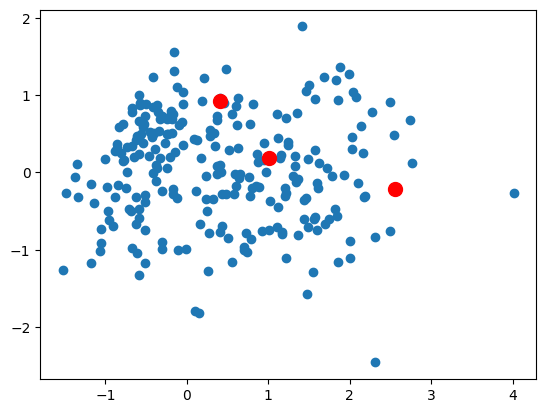

In [19]:
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

to get closest centroid of each point

In [20]:
def closest_centroid(points, centroids):
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [21]:
c = initialize_centroids(points, 3)
closest_centroid(points, c)

array([0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1])

In [22]:
c

array([[ 0.72955373, -0.78185774],
       [ 0.14600745, -1.82005641],
       [ 1.2413538 ,  0.34934305]])

In [24]:
c_extended = c[: , np.newaxis, :]
c_extended

array([[[ 0.72955373, -0.78185774]],

       [[ 0.14600745, -1.82005641]],

       [[ 1.2413538 ,  0.34934305]]])

In [25]:
c_extended.shape

(3, 1, 2)

In [26]:
p = points[0]
p

array([ 1.01194857, -0.7467902 ])

In [27]:
c_extended - p

array([[[-0.28239484, -0.03506754]],

       [[-0.86594112, -1.07326622]],

       [[ 0.22940523,  1.09613325]]])

In [28]:
(c_extended - p).shape

(3, 1, 2)

In [29]:
points[:4] - c_extended

array([[[ 0.28239484,  0.03506754],
        [ 1.41154911,  1.38904311],
        [-0.35361033,  0.86551481],
        [-0.44982805,  1.25489769]],

       [[ 0.86594112,  1.07326622],
        [ 1.99509538,  2.42724178],
        [ 0.22993595,  1.90371349],
        [ 0.13371823,  2.29309637]],

       [[-0.22940523, -1.09613325],
        [ 0.89974903,  0.25784232],
        [-0.8654104 , -0.26568598],
        [-0.96162812,  0.1236969 ]]])

In [30]:
np.sqrt(((points[:4] - c_extended)**2).sum(axis=2))

array([[0.28456384, 1.98038169, 0.93496318, 1.3330842 ],
       [1.37904111, 3.1419593 , 1.91754937, 2.29699184],
       [1.11988163, 0.93596527, 0.90527576, 0.96955122]])

In [31]:
np.argmin(np.sqrt(((points[:4] - c_extended)**2).sum(axis=2)), axis=0)

array([0, 2, 2, 2])

To move centroids to the mean location

In [32]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [33]:
move_centroids(points, closest_centroid(points, c), c)

array([[ 0.15076635, -0.33209191],
       [-0.54277202, -1.08634432],
       [ 0.7544334 ,  0.5049337 ]])

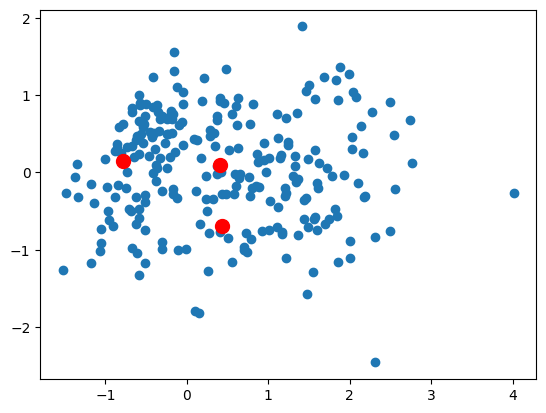

In [35]:
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

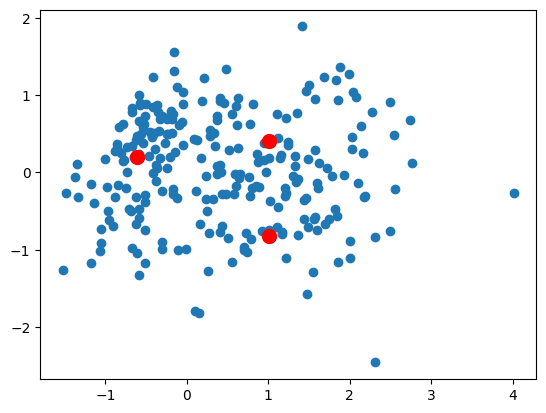

In [36]:
plt.scatter(points[:, 0], points[:, 1])
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)